# Preprocessing phase

To start, we are going to explore the data received and start transforming the raw data to a more cleaned and organized data.

Lets start by importing and reading the raw data given.

In [3]:
import pandas as pd

file_path = './data/dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,Negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,Positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,Positive


Dataset information:

In [5]:
num_rows, num_cols = df.shape
column_names = df.columns.to_list()

data_types = df.dtypes

# Display the information
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)
print("Data types of columns:")
print(data_types)

Number of rows: 400
Number of columns: 5
Column names: ['Date_published', 'Headline', 'Synopsis', 'Full_text', 'Final Status']
Data types of columns:
Date_published    object
Headline          object
Synopsis          object
Full_text         object
Final Status      object
dtype: object


Lets check if there are any missing values in the dataset.

In [6]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          1
Full_text         0
Final Status      0
dtype: int64
Total records     400


In [7]:
# print missing value
df[df.isnull().any(axis=1)]

,Date_published,Headline,Synopsis,Full_text,Final Status
56,2022-04-08,RBI keeps repo rate unchanged; reduces growth ...,NaN,ANIStory outlineThe benchmark repo rate stands...,Negative


Drop the missing record that does not have a synopsis.

In [8]:
df.dropna(inplace=True)

Lets check if the removal of null values was successful.

In [9]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          0
Full_text         0
Final Status      0
dtype: int64
Total records     399


As we can see, there is a news data that does not have the synopsis.

In [10]:
# Initialize empty dictionaries to store column categories
categorical_cols = {}
continuous_cols = {}
discrete_cols = {}

# Iterate over each column and categorize based on data type and unique value count
for column in df.columns:
    unique_count = df[column].nunique()
    if data_types[column] == 'object' or unique_count <= 10:
        categorical_cols[column] = unique_count
    elif data_types[column] in ['int64', 'float64']:
        if unique_count <= 10:
            discrete_cols[column] = unique_count
        else:
            continuous_cols[column] = unique_count

# Display categorized columns
print(f"Categorical columns: {categorical_cols}")
print(f"Continuous columns: {continuous_cols}")
print(f"Discrete columns: {discrete_cols}")

Categorical columns: {'Date_published': 75, 'Headline': 367, 'Synopsis': 398, 'Full_text': 399, 'Final Status': 3}
Continuous columns: {}
Discrete columns: {}


Now, we are going to analyse the number of unique values in each column.

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}' ({len(unique_values)} results found):")
    print(unique_values)
    print()

Unique values in column 'Date_published' (75 results found):
['2022-06-21' '2022-04-19' '2022-05-27' '2022-04-06' '2022-06-14'
 '2022-05-13' '2022-05-25' '2022-04-27' '2022-06-13' '2022-05-07'
 '2022-06-20' '2022-05-31' '2022-06-09' '2022-06-08' '2022-04-18'
 '2022-06-17' '2022-04-12' '2022-06-29' '2022-04-09' '2022-06-11'
 '2022-06-05' '2022-04-04' '2022-06-06' '2022-05-21' '2022-05-19'
 '2022-05-24' '2022-06-02' '2022-05-10' '2022-06-07' '2022-05-30'
 '2022-05-16' '2022-06-18' '2022-05-14' '2022-06-16' '2022-06-23'
 '2022-04-24' '2022-04-11' '2022-06-28' '2022-04-13' '2022-04-21'
 '2022-04-07' '2022-05-11' '2022-04-23' '2022-04-25' '2022-04-01'
 '2022-06-25' '2022-04-29' '2022-06-01' '2022-05-02' '2022-04-20'
 '2022-05-12' '2022-05-17' '2022-06-26' '2022-06-03' '2022-06-22'
 '2022-05-05' '2022-05-09' '2022-05-04' '2022-05-26' '2022-04-17'
 '2022-04-08' '2022-05-18' '2022-06-24' '2022-06-30' '2022-06-10'
 '2022-04-26' '2022-06-27' '2022-04-05' '2022-05-06' '2022-06-15'
 '2022-04-22' '

By analysing the unique values in each column, we can get to some conclusions:

1. In the **'Date_published'** column we can see that the news on this dataset goes from the day '01-04-2022' to the day '30-06-2022' (3 full months of data news).
2. In the **'Headline'** column, there are some news that have the same headline (check if they are duplicates or the synopysys or full-text differ between them).
3. In the **'Synopsis'** and **'Full_text'** columns it's noticible the presence of special characters.
4. The **'Final Score'** column has a low and finite number of possible solutions. This means that this column can be transformed to an integer range of values from 0 to 2 ([0,2]).

Now, lets see if the dataset is balanced.

In [157]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print("\n", final_status_proportion)

Positive     215
Negative     183
Positive       1
Name: Final Status, dtype: int64

 Positive     0.538847
Negative     0.458647
Positive     0.002506
Name: Final Status, dtype: float64


As we can see here, the code is separating one of the positive records from the other positive records. This is because the single positive record has an extra space in the end and the other don't. So, we have to deal with this by removing all the unnecessary characters.

In [158]:
import re
import unidecode

# Remove accents and punctuation
for column in ['Headline', 'Synopsis', 'Full_text']:
    df[column] = df[column].apply(lambda record: unidecode.unidecode(record))   # Remove accents

df['Final Status'] = df['Final Status'].str.strip()   # Trimming Spaces
df['Final Status'] = df['Final Status'].str.lower()   # Case Normalization

# Remove punctuation without removing numbers
df['Headline'].apply(lambda record: re.sub('[^a-zA-Z0-9]', ' ', record))
df['Synopsis'].apply(lambda record: re.sub('[^a-zA-Z0-9]', ' ', record))
df['Full_text'].apply(lambda record: re.sub('[^a-zA-Z0-9]', ' ', record))

0      ReutersPayments companies and banks are at log...
1      AgenciesThe bank presently has 20 million acti...
2      PTIKarnataka Chief Minister Basavaraj Bommai K...
3      Getty ImagesThe budget for FY22 had imposed in...
4      AgenciesThere is a view in the insurance indus...
                             ...                        
395    PTIICICI Bank  Bank of Baroda  Punjab National...
396    ReutersThe logo of the Securities and Exchange...
397    Getty ImagesShrikant Chouhan of Kotak Securiti...
398    AgenciesThe PSU bank reported a 41 27 per cent...
399    Shutterstock comAgarwal said the global econom...
Name: Full_text, Length: 399, dtype: object

In [159]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print("\n", final_status_proportion)

positive    216
negative    183
Name: Final Status, dtype: int64

 positive    0.541353
negative    0.458647
Name: Final Status, dtype: float64


In [160]:
import plotly.express as px

status_counts = df['Final Status'].value_counts()
status_counts_df = pd.DataFrame(status_counts).reset_index()

fig = px.pie(status_counts_df, values='Final Status', names='index', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As we can see, the dataset's is almost balanced. This slight imbalance will probably not affect significantly the model's performance.

Now, lets move on to the exploratory analysis of the dataset.

Firstly, as the dataset consists of news of 3 full months, lets start by exploring the publication data of each news article, in order to identify trends or patterns in publication frequency over time, and to explore how sentiments vary accross the different time periods.

In [161]:
import matplotlib.pyplot as plt

df['Date_published'] = pd.to_datetime(df['Date_published'])    # Convert from string to datetime format

daily_counts = df.groupby(df['Date_published'].dt.date).size()
monthly_counts = df.groupby(df['Date_published'].dt.to_period('M')).size()

Plotting the news by days.

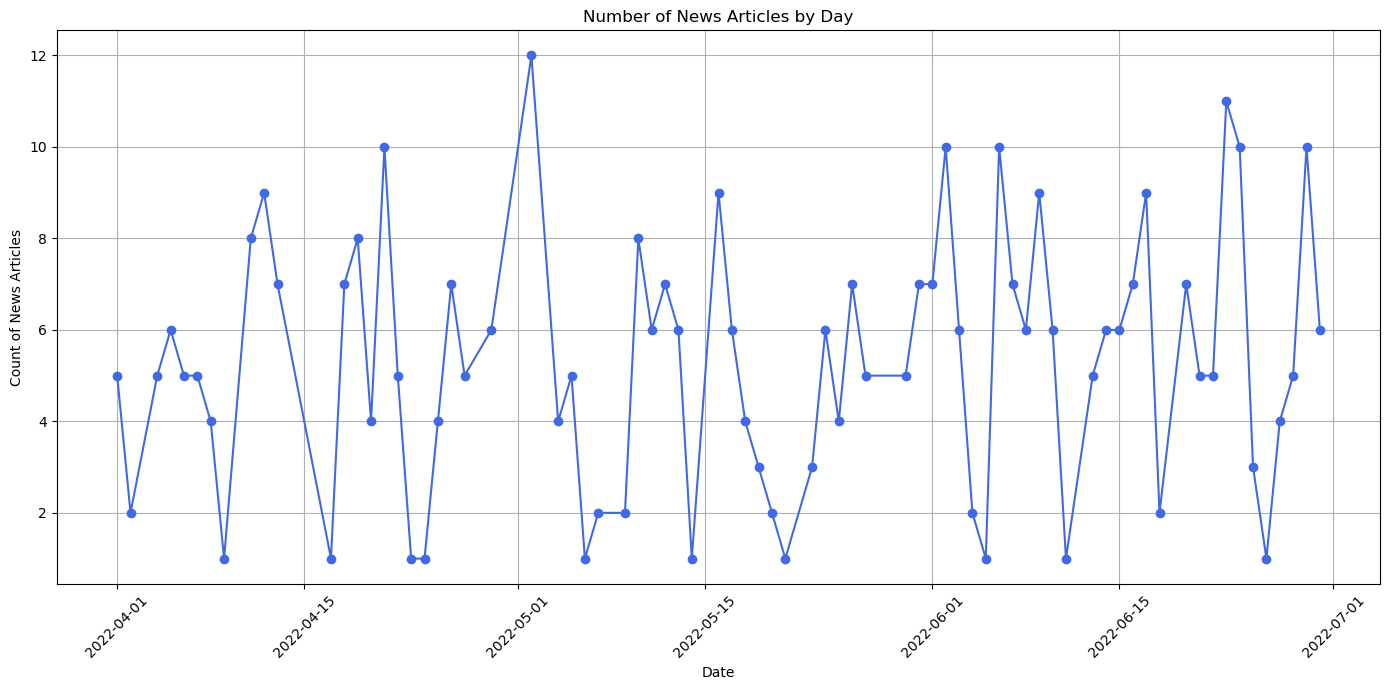

In [162]:
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', marker='o', color='royalblue')
plt.title('Number of News Articles by Day')
plt.xlabel('Date')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

- In this graph (number of news per day), we can see that the number of publications per day ranges between 0 and 12 articles published.
- Does not seem that there is a clear pattern of news publication during this time period, as there are peaks occuring irregularly.

Plotting the news by months.

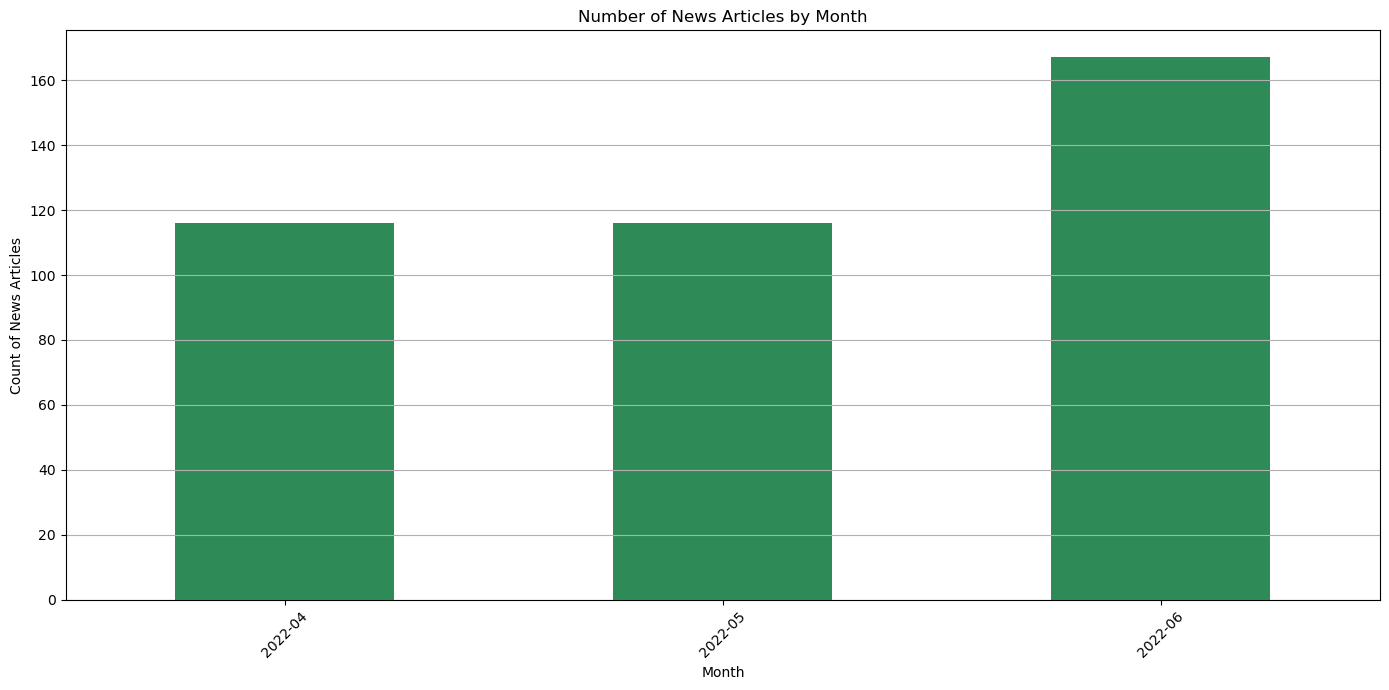

In [163]:
plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='bar', color='seagreen')
plt.title('Number of News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In this barchart, we can see in April and May months, the total number of publications is practically the same but, in the June month, the total number of publications increased rapidly.

Now, lets see what languages our dataset has.

In [164]:
from langdetect import detect, DetectorFactory
from langcodes import Language

DetectorFactory.seed = 0   # To get consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Function to convert ISO 639-1 codes to full language names
def get_full_language_name(iso_code):
    try:
        return str(Language.get(iso_code).display_name())
    except:
        return None    

df['language'] = df['Headline'].apply(detect_language)   # Apply language detection
df['language'] = df['language'].apply(get_full_language_name)    # Convert the languages code to the correspondant full extended language name (e.g., pt -> portuguese)

language_counts = df['language'].value_counts()
print(language_counts)

English       340
Swedish        49
French          3
Catalan         3
Afrikaans       2
German          1
Portuguese      1
Name: language, dtype: int64


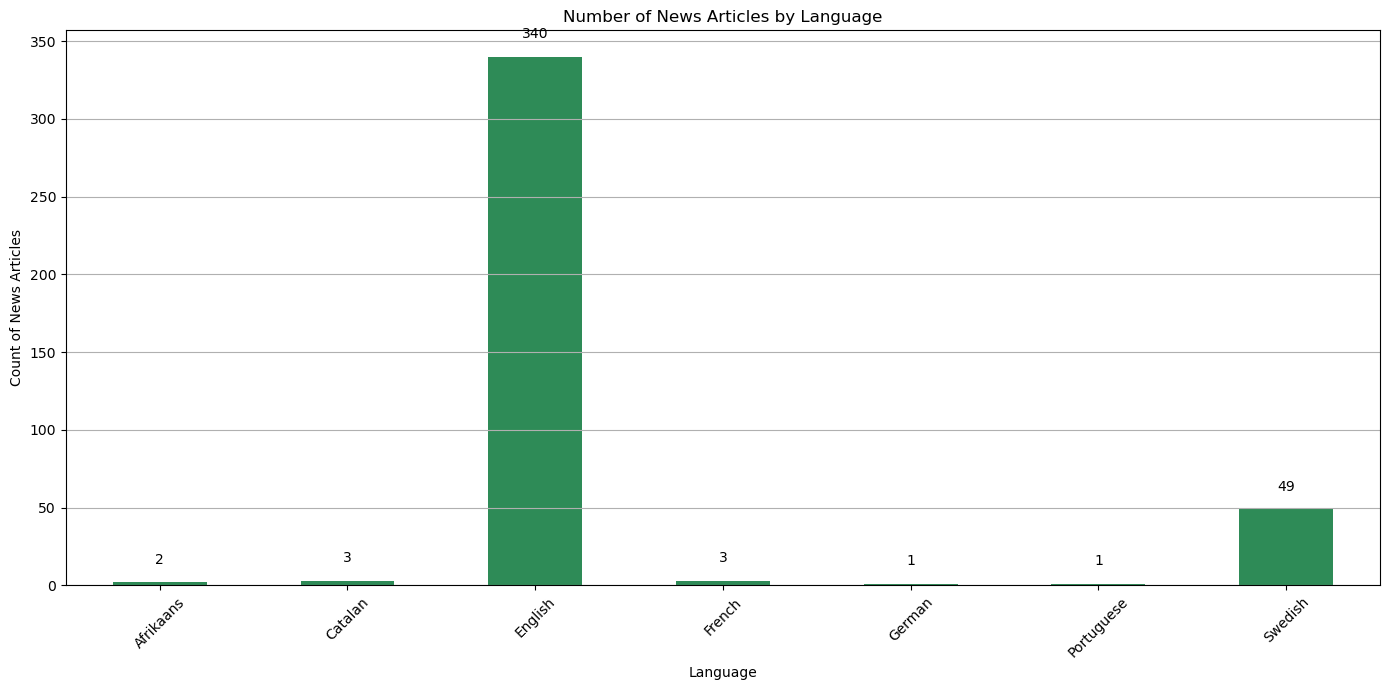

In [165]:
language_counts = df.groupby(df['language']).size()

plt.figure(figsize=(14, 7))
language_counts.plot(kind='bar', color='seagreen')
# add number of news articles on top of each bar
for index, value in enumerate(language_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')
plt.title('Number of News Articles by Language')
plt.xlabel('Language')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [166]:
# print the news that are not in english
non_english_news = df[df['language'] != 'English']
non_english_news

,Date_published,Headline,Synopsis,Full_text,Final Status,language
74,2022-06-02,Stock market update: Fertilisers stocks down ...,The 30-share BSE Sensex was up 47.15 points ...,Getty ImagesNEW DELHI: Fertilisers stocks were...,negative,Swedish
77,2022-04-18,Stock market update: Sugar stocks up as mark...,The 30-share BSE Sensex was down 1183.89 poi...,ReutersNifty continues to climb a wall of worr...,negative,Swedish
105,2022-04-19,Stock market update: Fertilisers stocks up a...,The 30-share BSE Sensex was down 38.42 point...,ReutersInvestors should therefore use dips tow...,positive,Swedish
109,2022-05-04,Adani Transmission declines 1.35% as Sensex ...,"The stock traded at a P/E multiple of 254.23, ...",Shutterstock.comAgarwal said the global econom...,negative,French
118,2022-04-11,Stock market update: Mining stocks up as mar...,The 30-share BSE Sensex was down 358.76 poin...,Shutterstock.comRSI has turned north from the ...,positive,Swedish
125,2022-04-11,MRF rises 0.13% as Sensex slides,"The stock traded at a P/E multiple of 34.35, w...",Getty ImagesIndia 10-year bond yield declined ...,positive,French
133,2022-05-18,Stock market update: Nifty Bank index falls ...,The Nifty Bank index closed 0.4 per cent down...,"ReutersStocks in focus: RIL, Tata Motors, Info...",negative,Swedish
138,2022-06-24,Stock market update: Nifty Auto index advance...,The Nifty Auto index was trading 1.42 per cent...,ThinkStock PhotosNEW DELHI: The Nifty Auto ind...,positive,Swedish
142,2022-06-03,Stock market update: Fertilisers stocks down ...,The 30-share BSE Sensex closed down 48.88 po...,Shutterstock.comRSI has turned north from the ...,negative,Swedish
145,2022-06-10,Stock market update: Nifty Bank index falls ...,The Nifty Bank index closed 1.71 per cent dow...,Getty ImagesNEW DELHI: The Nifty Bank index cl...,negative,Swedish


As we can see, the records that the _langdetect_ library detect are not correct, because they are all in _English_. So, we will not need to translate or remove any news from the dataset.

### Wordclouds

Now, lets see what are the most common words in the dataset. First, lets join the columns **Headline**, **Synopsis** and **Full Text**.

In [167]:
df_wc = df.copy()
df_wc['Complete_text'] =  df_wc['Headline'] + ' ' + df_wc['Synopsis'] + ' ' + df_wc['Full_text']   # Concatenate the text columns
df_wc.drop(columns=['Headline', 'Synopsis', 'Full_text'], inplace=True)   # Drop the original text columns

Compute the result dataset.

In [168]:
df_wc.head()

,Date_published,Final Status,language,Complete_text
0,2022-06-21,negative,English,"Banks holding on to subsidy share, say payment..."
1,2022-04-19,positive,English,Digitally ready Bank of Baroda aims to click o...
2,2022-05-27,positive,English,Karnataka attracted investment commitment of R...
3,2022-04-06,negative,English,Splitting of provident fund accounts may be de...
4,2022-06-14,positive,English,Irdai weighs proposal to privatise Insurance I...


Now, lets compute the most used words in general.

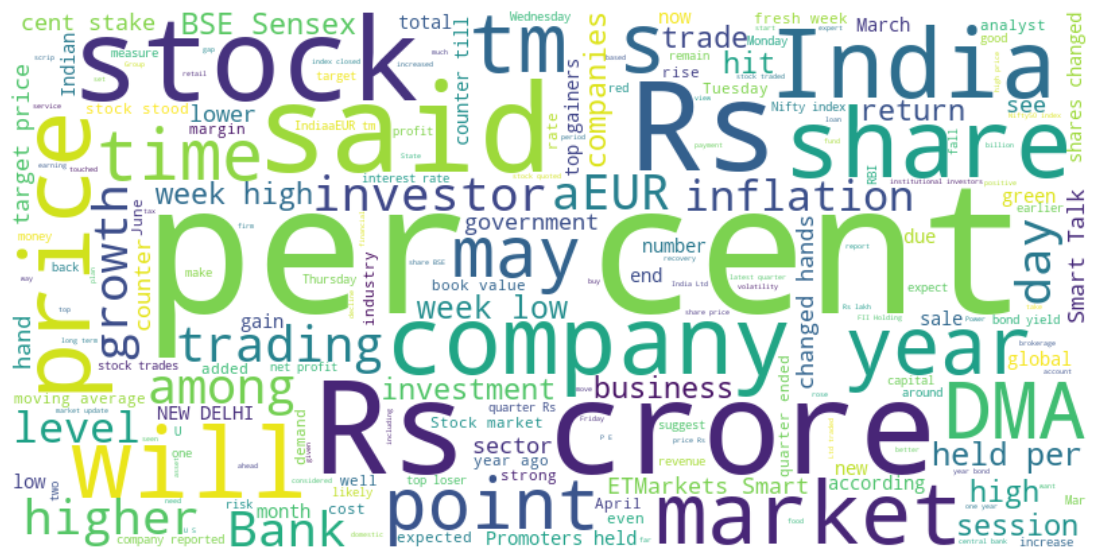

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus = " ".join(df_wc['Complete_text'].dropna().values)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white'
).generate(corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

Following this, lets compute the words most used in each class (_Positive_ and _Negative_) of the **Final Status** column.

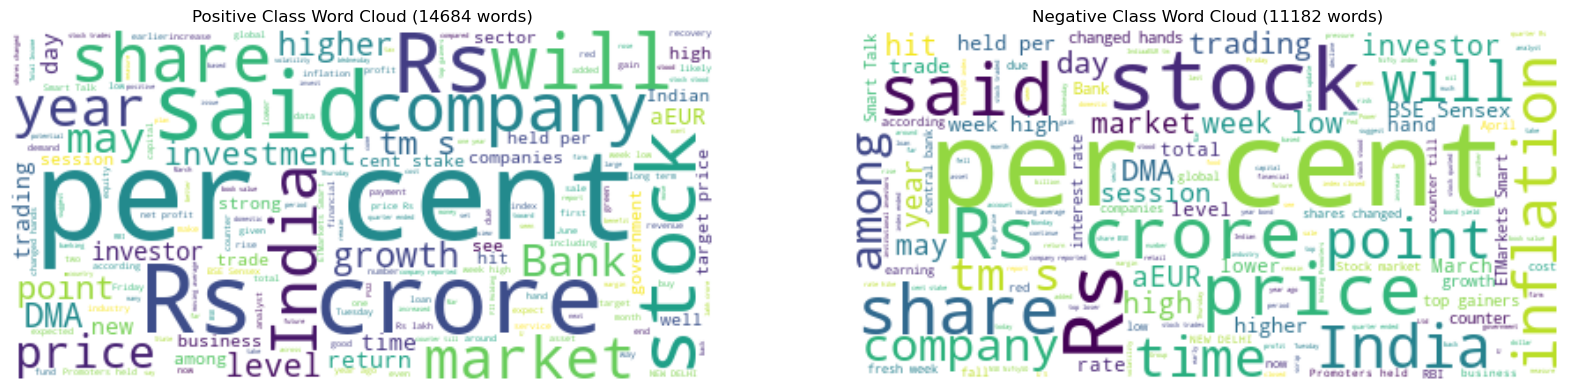

In [170]:
def generate_wordcloud(corpus):
    wordcloud = WordCloud(
        width=400, height=200,
        background_color='white'
    ).generate(corpus)
    return wordcloud

# Generate word clouds for positive and negative classes
positive_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'positive']['Complete_text'].dropna().values)
negative_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'negative']['Complete_text'].dropna().values)

# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

As we can see, we notice some words are unecessary. Like, for example, the words _per cent_ and _India_ in the negative class. Lets remove the common words from both classes. 

In [171]:
# Find common words between the two sets
common_words = positive_words.intersection(negative_words)

# Remove common words from each corpus
positive_corpus_str = " ".join([word for word in positive_corpus_str.split() if word not in common_words])
negative_corpus_str = " ".join([word for word in negative_corpus_str.split() if word not in common_words])

corpus = " ".join(word for word in corpus.split() if word not in common_words)

Lets check if all the comman words were removed from the corpus.

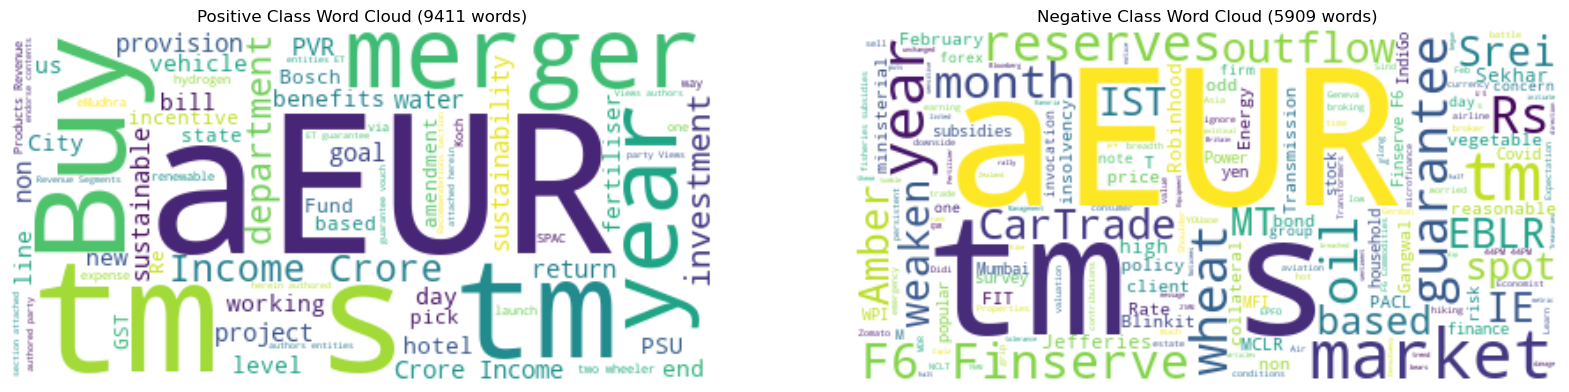

In [172]:
# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()